In [1]:
# 케라스를 이용한 보스턴 교외 지역 평균 월세 예측

In [2]:
# 모듈(=~.py), 패키지(모듈의 집합) 불러오기
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler # 데이터 전처리를 위한 클래스
from sklearn.model_selection import train_test_split # 데이터 전처리를 위한 함수

In [3]:
# 하이퍼패러미터 설정
MY_BATCH = 32 # 한 학습에서 데이터를 몇 개씩 loading할 것인지 설정하는 변수
MY_EPOCH = 500 # 학습 횟수를 설정하는 변수

# MY_EPOCH = 0 # Q1
# MY_BATCH = 1 # Q4
# MY_EPOCH = 50 # Q5-2

In [4]:
# 데이터 불러오기
labels = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age',
'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

raw_DB = pd.read_csv("housing.csv", names=labels, delim_whitespace=True)

In [5]:
# raw_DB = raw_DB.drop("crim", axis=1) # Q7
# labels = ['zn', 'indus', 'chas', 'nox', 'rm', 'age',
# 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'] # Q7

In [6]:
# 원본 데이터 확인
# display(raw_DB)
display(raw_DB.describe())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

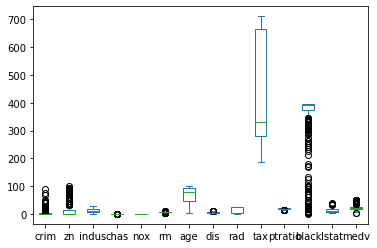

In [7]:
# 원본 데이터 시각화
raw_DB.plot.box()

In [8]:
raw_DB.shape

(506, 14)

In [9]:
# z-점수 정규화 방식의 스케일링(=데이터를 고르게 분포시키는 작업) 진행
scaler = StandardScaler() # 스케일링을 위한 객체 생성
scaled_DB = scaler.fit_transform(raw_DB) # 원본 데이터를 입력해서 스케일링된 데이터 생성

In [10]:
# numpy ndarray 객체를 pandas DataFrame으로 변환
scaled_DB = pd.DataFrame(scaled_DB, columns=labels)

In [11]:
# 스케일링된 데이터 확인
# print(type(scaled_DB))
# display(scaled_DB)
display(scaled_DB.describe()) # 평균 0, 표준편차 1인 표준정규분포 양상 확인

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16,-4.247810e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


<AxesSubplot:>

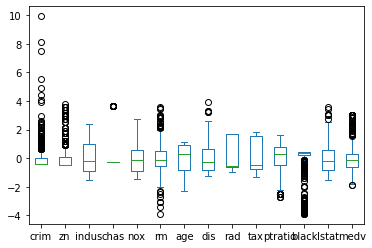

In [12]:
# 스케일링된 데이터 시각화
scaled_DB.plot.box()

In [13]:
# 스케일링된 데이터를 입력 데이터와 출력 데이터로 분할
# x = scaled_DB.drop("medv", axis=1) # 집값 열을 제외한 13개의 열 선택
# y = scaled_DB["medv"] # 집값 열 선택

# x = raw_DB.drop("medv", axis=1) # Q3
# y = raw_DB["medv"] # Q3

x = scaled_DB.drop("age", axis=1) # Q8
y = scaled_DB["age"] # Q8

In [14]:
# 입력 데이터와 출력 데이터 확인
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [15]:
# 학습용 데이터와 평가용 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [16]:
# x_train = x_train[:int(354/2)] # Q6
# y_train = y_train[:int(354/2)] # Q6

In [17]:
# 학습용 데이터와 평가용 데이터 확인
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [18]:
display(x_train) # pseudo-random

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,black,lstat,medv
445,0.821394,-0.487722,1.015999,-0.272599,1.600725,0.248411,-0.859060,1.661245,1.530926,0.806576,-3.438577,1.587740,-1.168132
428,0.436817,-0.487722,1.015999,-0.272599,1.073787,-0.130548,-0.883922,1.661245,1.530926,0.806576,-2.850120,1.242912,-1.255202
481,0.243762,-0.487722,1.015999,-0.272599,-0.196047,0.662987,-0.220259,1.661245,1.530926,0.806576,0.399058,-0.688683,0.127034
55,-0.418992,3.375039,-1.446951,-0.272599,-1.310392,1.373892,2.330049,-0.523001,-1.082358,-0.256858,0.430417,-1.099392,1.400433
488,-0.402961,-0.487722,2.422565,-0.272599,0.469104,-1.183370,-0.938447,-0.637962,1.798194,0.760340,0.421206,0.757911,-0.798084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.241850,-0.487722,1.015999,-0.272599,0.244507,-0.243096,-0.118435,1.661245,1.530926,0.806576,0.394782,0.326176,-0.373618
189,-0.410777,1.443658,-1.123032,-0.272599,-1.016689,1.282714,0.366822,-0.523001,-0.060801,-1.505237,0.441052,-1.018091,1.346014
495,-0.399688,-0.487722,-0.211099,-0.272599,0.261784,-0.875644,-0.473678,-0.408041,-0.102376,0.344213,0.401471,0.693431,0.061732
206,-0.393788,-0.487722,-0.079780,-0.272599,-0.567496,0.058932,0.266139,-0.637962,-0.779455,0.066796,0.418794,-0.235921,0.203221


In [19]:
# 인공 신경망 모델 생성
model = Sequential() # 모델 객체 생성
model.add(Dense(200, activation="relu", input_dim=13)) # 첫 번째 은닉층 추가

# model.add(Dense(200, activation="relu", input_dim=12)) # Q7

model.add(Dense(1000, activation="relu")) # 두 번째 은닉층 추가

# model.add(Dense(500, activation="relu")) # Q2
# model.add(Dense(500, activation="relu")) # Q2

model.add(Dense(1, activation="linear")) # 출력층 추가

model.summary() # 모델 요약 정보 출력
# model.save("housing_before.h5") # weights 저장

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              201000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 204,801
Trainable params: 204,801
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 환경 설정
model.compile(optimizer="sgd", loss="mse", metrics=["acc"])

# model.compile(optimizer="adam", loss="mse", metrics=["acc"]) # Q5

In [21]:
# 학습 진행
import time
begin = time.time()

model.fit(x_train, y_train, batch_size=MY_BATCH, epochs=MY_EPOCH, verbose=1)
# model.save("housing_after.h5") # weights 저장

end = time.time()
print("학습 시간:", end-begin)

Epoch 1/500
12/12 [==============================] - 0s 831us/step - loss: 0.7649 - acc: 0.0000e+00
Epoch 2/500
12/12 [==============================] - 0s 914us/step - loss: 0.4924 - acc: 0.0000e+00
Epoch 3/500
12/12 [==============================] - 0s 831us/step - loss: 0.4315 - acc: 0.0000e+00
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3968 - acc: 0.0000e+00
Epoch 5/500
12/12 [==============================] - 0s 914us/step - loss: 0.3836 - acc: 0.0000e+00
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3591 - acc: 0.0000e+00
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3448 - acc: 0.0000e+00
Epoch 8/500
12/12 [==============================] - 0s 913us/step - loss: 0.3376 - acc: 0.0000e+00
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3216 - acc: 0.0000e+00
Epoch 10/500
12/12 [==============================] - 0s 914us/step - loss: 0.3146 - acc: 0.0000e+00
Epoch 1

12/12 [==============================] - 0s 748us/step - loss: 0.1524 - acc: 0.0000e+00
Epoch 83/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1462 - acc: 0.0000e+00
Epoch 84/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1484 - acc: 0.0000e+00
Epoch 85/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1448 - acc: 0.0000e+00
Epoch 86/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1482 - acc: 0.0000e+00
Epoch 87/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1432 - acc: 0.0000e+00
Epoch 88/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1430 - acc: 0.0000e+00
Epoch 89/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1407 - acc: 0.0000e+00
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1700 - acc: 0.0000e+00
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1460 - acc: 0.0000e+00
Epoch 92/500
12/12 [=

Epoch 163/500
12/12 [==============================] - 0s 748us/step - loss: 0.1181 - acc: 0.0000e+00
Epoch 164/500
12/12 [==============================] - 0s 748us/step - loss: 0.1052 - acc: 0.0000e+00
Epoch 165/500
12/12 [==============================] - 0s 665us/step - loss: 0.1139 - acc: 0.0000e+00
Epoch 166/500
12/12 [==============================] - 0s 748us/step - loss: 0.1051 - acc: 0.0000e+00
Epoch 167/500
12/12 [==============================] - 0s 748us/step - loss: 0.1055 - acc: 0.0000e+00
Epoch 168/500
12/12 [==============================] - 0s 665us/step - loss: 0.1107 - acc: 0.0000e+00
Epoch 169/500
12/12 [==============================] - 0s 665us/step - loss: 0.1036 - acc: 0.0000e+00
Epoch 170/500
12/12 [==============================] - 0s 794us/step - loss: 0.1043 - acc: 0.0000e+00
Epoch 171/500
12/12 [==============================] - 0s 665us/step - loss: 0.1034 - acc: 0.0000e+00
Epoch 172/500
12/12 [==============================] - 0s 748us/step - loss: 0.107

12/12 [==============================] - 0s 665us/step - loss: 0.0840 - acc: 0.0000e+00
Epoch 244/500
12/12 [==============================] - 0s 831us/step - loss: 0.0863 - acc: 0.0000e+00
Epoch 245/500
12/12 [==============================] - 0s 665us/step - loss: 0.0835 - acc: 0.0000e+00
Epoch 246/500
12/12 [==============================] - 0s 748us/step - loss: 0.0841 - acc: 0.0000e+00
Epoch 247/500
12/12 [==============================] - 0s 748us/step - loss: 0.1002 - acc: 0.0000e+00
Epoch 248/500
12/12 [==============================] - 0s 914us/step - loss: 0.0845 - acc: 0.0000e+00
Epoch 249/500
12/12 [==============================] - 0s 748us/step - loss: 0.0825 - acc: 0.0000e+00
Epoch 250/500
12/12 [==============================] - 0s 858us/step - loss: 0.0835 - acc: 0.0000e+00
Epoch 251/500
12/12 [==============================] - 0s 665us/step - loss: 0.0835 - acc: 0.0000e+00
Epoch 252/500
12/12 [==============================] - 0s 748us/step - loss: 0.0815 - acc: 0.000

12/12 [==============================] - 0s 1ms/step - loss: 0.0682 - acc: 0.0000e+00
Epoch 324/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0717 - acc: 0.0000e+00
Epoch 325/500
12/12 [==============================] - 0s 914us/step - loss: 0.0703 - acc: 0.0000e+00
Epoch 326/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0732 - acc: 0.0000e+00
Epoch 327/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0723 - acc: 0.0000e+00
Epoch 328/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0694 - acc: 0.0000e+00
Epoch 329/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0735 - acc: 0.0000e+00
Epoch 330/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0685 - acc: 0.0000e+00
Epoch 331/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0668 - acc: 0.0000e+00
Epoch 332/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0673 - acc: 0.0000e+00
Epoch 333/50

12/12 [==============================] - 0s 1ms/step - loss: 0.0589 - acc: 0.0000e+00
Epoch 405/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0612 - acc: 0.0000e+00
Epoch 406/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0601 - acc: 0.0000e+00
Epoch 407/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0569 - acc: 0.0000e+00
Epoch 408/500
12/12 [==============================] - 0s 997us/step - loss: 0.0585 - acc: 0.0000e+00
Epoch 409/500
12/12 [==============================] - 0s 997us/step - loss: 0.0592 - acc: 0.0000e+00
Epoch 410/500
12/12 [==============================] - 0s 914us/step - loss: 0.0573 - acc: 0.0000e+00
Epoch 411/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0558 - acc: 0.0000e+00
Epoch 412/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0573 - acc: 0.0000e+00
Epoch 413/500
12/12 [==============================] - 0s 997us/step - loss: 0.0609 - acc: 0.0000e+00
Epoch 

12/12 [==============================] - 0s 831us/step - loss: 0.0505 - acc: 0.0000e+00
Epoch 485/500
12/12 [==============================] - 0s 735us/step - loss: 0.0524 - acc: 0.0000e+00
Epoch 486/500
12/12 [==============================] - 0s 748us/step - loss: 0.0522 - acc: 0.0000e+00
Epoch 487/500
12/12 [==============================] - 0s 748us/step - loss: 0.0495 - acc: 0.0000e+00
Epoch 488/500
12/12 [==============================] - 0s 914us/step - loss: 0.0493 - acc: 0.0000e+00
Epoch 489/500
12/12 [==============================] - 0s 832us/step - loss: 0.0488 - acc: 0.0000e+00
Epoch 490/500
12/12 [==============================] - 0s 786us/step - loss: 0.0532 - acc: 0.0000e+00
Epoch 491/500
12/12 [==============================] - 0s 665us/step - loss: 0.0501 - acc: 0.0000e+00
Epoch 492/500
12/12 [==============================] - 0s 748us/step - loss: 0.0507 - acc: 0.0000e+00
Epoch 493/500
12/12 [==============================] - 0s 665us/step - loss: 0.0507 - acc: 0.000

In [22]:
# 평가 진행
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"{loss=}, {acc=}")

5/5 [==============================] - 0s 598us/step - loss: 0.1938 - acc: 0.0000e+00
평가 손실값: 0.1938052624464035
평가 정확도: 0.0


In [23]:
# 예측 진행
y_pred = model.predict(x_test)

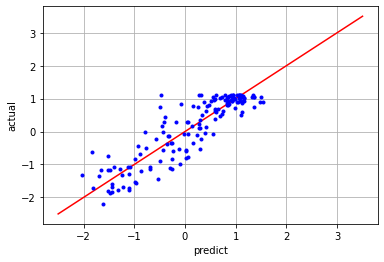

In [24]:
# 예측 결과 시각화
plt.plot([-2.5, 3.5], [-2.5, 3.5], "r") # 예측값과 실제값이 일치하는 y=x 그래프 그리기
# plt.scatter(y_pred, y_test) # 예측값과 실제값을 이용해서 산점도 그리기
plt.plot(y_pred, y_test, "b.")

plt.xlabel("predict")
plt.ylabel("actual")
plt.grid()

plt.show()

In [25]:
# 집값과 13개의 지표를 합치기
scaled_actual = x_test.copy() # 13개의 지표 데이터 사본 생성
# scaled_actual["medv"] = y_test # 실제 집값 열 추가

scaled_actual["age"] = y_test # Q8

# display(scaled_actual) # 실제 집값 열을 가지는 (152, 14) 형태의 데이터프레임 생성

scaled_predict = x_test.copy() # 13개의 지표 데이터 사본 생성
# scaled_predict["medv"] = y_pred # 예측 집값 열 추가

scaled_predict["age"] = y_pred # Q8

# display(scaled_predict) # 예측 집값 열을 가지는 (152, 14) 형태의 데이터프레임 생성

In [26]:
labels = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm',
'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv', 'age'] # Q8

In [27]:
# 스케일링 되돌리기
inversed_actual = scaler.inverse_transform(scaled_actual) # 스케일링 되돌린 실제 집값 데이터 리턴
inversed_actual = pd.DataFrame(inversed_actual, index=x_test.index, columns=labels) # ndarray => df 변환
# display(inversed_actual)
# display(inversed_actual.describe())

inversed_predict = scaler.inverse_transform(scaled_predict) # 스케일링 되돌린 예측 집값 데이터 리턴
inversed_predict = pd.DataFrame(inversed_predict, index=x_test.index, columns=labels) # ndarray => df 변환
# display(inversed_predict)
# display(inversed_predict.describe())

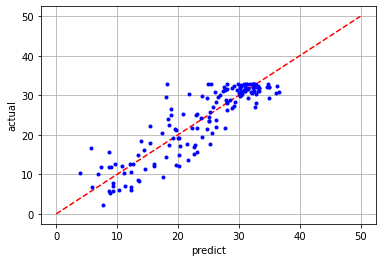

In [28]:
# 예측 데이터와 실제 데이터 시각화
plt.plot([0, 50], [0, 50], "r--")
# plt.plot(inversed_predict["medv"], inversed_actual["medv"], "b.")

plt.plot(inversed_predict["age"], inversed_actual["age"], "b.") # Q8

plt.xlabel("predict")
plt.ylabel("actual")
plt.grid()
plt.show()

In [29]:
# 집값 비교를 위한 데이터프레임 생성
medv_compare = pd.DataFrame(inversed_predict["medv"]) # 예측 집값을 가지는 데이터프레임 생성
medv_compare = medv_compare.rename(columns={"medv": "predict"}) # 열 이름 변경
medv_compare["actual"] = inversed_actual["medv"] # 실제 집값 열 추가
display(medv_compare)

,predict,actual
226,24.351937,24.351937
292,16.820403,16.820403
90,12.705236,12.705236
373,5.872504,5.872504
273,22.488465,22.488465
...,...,...
60,9.677093,9.677093
108,10.531185,10.531185
298,12.627591,12.627591
138,5.484281,5.484281


In [31]:
# Q8
age_compare = pd.DataFrame(inversed_predict["age"]) # 예측 age을 가지는 데이터프레임 생성
age_compare = age_compare.rename(columns={"age": "predict"}) # 열 이름 변경
age_compare["actual"] = inversed_actual["age"] # 실제 age 열 추가
display(age_compare)

,predict,actual
226,26.294143,28.389491
292,9.281720,7.772768
90,27.661491,21.724180
373,32.595867,32.800359
273,22.667304,17.051927
...,...,...
60,22.273647,21.756853
108,30.158183,31.852839
298,5.929922,6.694556
138,34.966560,32.212243


In [30]:
# 실제 집값 +-5% 범위 내로 예측한 데이터 목록 출력
medv_compare[
    (medv_compare["actual"] * 0.95 <= medv_compare["predict"])
    &
    (medv_compare["predict"] <= medv_compare["actual"] * 1.05)
].shape

(152, 2)

In [32]:
# Q8
age_compare[
    (age_compare["actual"] * 0.95 <= age_compare["predict"])
    &
    (age_compare["predict"] <= age_compare["actual"] * 1.05)
].shape

(45, 2)